In [1]:
import pandas as pd
df = pd.read_csv('MSFT.csv') #importing the dataset
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-11-25,247.309998,248.699997,246.729996,247.490005,245.314819,9200800
1,2022-11-28,246.080002,246.649994,240.800003,241.759995,239.635178,24778200
2,2022-11-29,241.399994,242.789993,238.210007,240.330002,238.217758,17956300
3,2022-11-30,240.570007,255.330002,239.860001,255.139999,252.897568,47594200
4,2022-12-01,253.869995,256.119995,250.919998,254.690002,252.451523,26041500
...,...,...,...,...,...,...,...
246,2023-11-17,373.609985,374.369995,367.000000,369.850006,369.850006,40157000
247,2023-11-20,371.220001,378.869995,371.000000,377.440002,377.440002,52465100
248,2023-11-21,375.670013,376.220001,371.119995,373.070007,373.070007,28423100
249,2023-11-22,378.000000,379.790009,374.970001,377.850006,377.850006,23345300


In [2]:
df = df[['Date', 'Close']]
df

,Date,Close
0,2022-11-25,247.490005
1,2022-11-28,241.759995
2,2022-11-29,240.330002
3,2022-11-30,255.139999
4,2022-12-01,254.690002
...,...,...
246,2023-11-17,369.850006
247,2023-11-20,377.440002
248,2023-11-21,373.070007
249,2023-11-22,377.850006


In [3]:
df['Date']

0      2022-11-25
1      2022-11-28
2      2022-11-29
3      2022-11-30
4      2022-12-01
          ...    
246    2023-11-17
247    2023-11-20
248    2023-11-21
249    2023-11-22
250    2023-11-24
Name: Date, Length: 251, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19') #converting string to datetime object
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [5]:
df

,Date,Close
0,2022-11-25,247.490005
1,2022-11-28,241.759995
2,2022-11-29,240.330002
3,2022-11-30,255.139999
4,2022-12-01,254.690002
...,...,...
246,2023-11-17,369.850006
247,2023-11-20,377.440002
248,2023-11-21,373.070007
249,2023-11-22,377.850006


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\a1876729\AppData\Local\Temp\ipykernel_17308\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2022-11-25
1     2022-11-28
2     2022-11-29
3     2022-11-30
4     2022-12-01
         ...    
246   2023-11-17
247   2023-11-20
248   2023-11-21
249   2023-11-22
250   2023-11-24
Name: Date, Length: 251, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
2022-11-25,247.490005
2022-11-28,241.759995
2022-11-29,240.330002
2022-11-30,255.139999
2022-12-01,254.690002
...,...
2023-11-17,369.850006
2023-11-20,377.440002
2023-11-21,373.070007


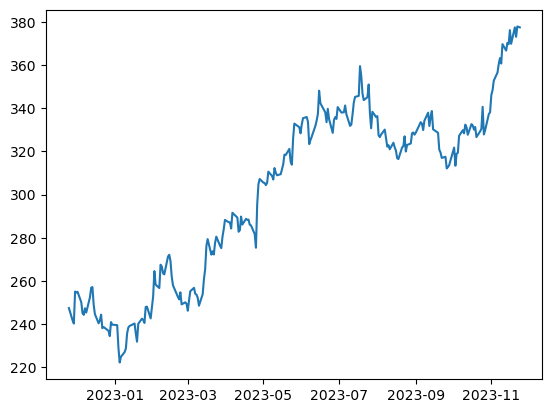

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close']) #plotting stock prices vs dates

In [23]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2022-11-30', 
                                '2023-11-24', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-11-30,247.490005,241.759995,240.330002,255.139999
1,2022-12-01,241.759995,240.330002,255.139999,254.690002
2,2022-12-02,240.330002,255.139999,254.690002,255.020004
3,2022-12-05,255.139999,254.690002,255.020004,250.199997
4,2022-12-06,254.690002,255.020004,250.199997,245.119995
...,...,...,...,...,...
243,2023-11-17,370.269989,369.670013,376.170013,369.850006
244,2023-11-20,369.670013,376.170013,369.850006,377.440002
245,2023-11-21,376.170013,369.850006,377.440002,373.070007
246,2023-11-22,369.850006,377.440002,373.070007,377.850006


In [24]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((248,), (248, 3, 1), (248,))

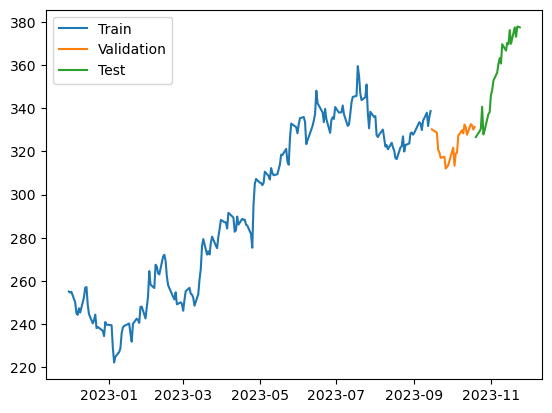

In [25]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test']) #plotting stock prices for training, validation and test vs dates for comparison

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100) #running predictions

Epoch 1/100
7/7 [==============================] - 2s 60ms/step - loss: 87103.4375 - mean_absolute_error: 292.6301 - val_loss: 104611.3516 - val_mean_absolute_error: 323.3600
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 86821.0078 - mean_absolute_error: 292.1458 - val_loss: 104274.5469 - val_mean_absolute_error: 322.8388
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 86494.7109 - mean_absolute_error: 291.5875 - val_loss: 103859.5469 - val_mean_absolute_error: 322.1954
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 86131.2109 - mean_absolute_error: 290.9644 - val_loss: 103447.1562 - val_mean_absolute_error: 321.5548
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 85697.4375 - mean_absolute_error: 290.2190 - val_loss: 102842.4062 - val_mean_absolute_error: 320.6130
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 85065.5469 - mean_absolute_error: 289.1230 - val_loss: 101

Epoch 49/100
7/7 [==============================] - 0s 5ms/step - loss: 1443.2294 - mean_absolute_error: 34.6648 - val_loss: 1188.1831 - val_mean_absolute_error: 33.7726
Epoch 50/100
7/7 [==============================] - 0s 5ms/step - loss: 1391.3428 - mean_absolute_error: 33.8116 - val_loss: 1083.0375 - val_mean_absolute_error: 32.1884
Epoch 51/100
7/7 [==============================] - 0s 5ms/step - loss: 1306.8845 - mean_absolute_error: 32.7990 - val_loss: 1115.3926 - val_mean_absolute_error: 32.7197
Epoch 52/100
7/7 [==============================] - 0s 5ms/step - loss: 1251.6080 - mean_absolute_error: 32.2179 - val_loss: 1195.9868 - val_mean_absolute_error: 33.9617
Epoch 53/100
7/7 [==============================] - 0s 5ms/step - loss: 1154.6339 - mean_absolute_error: 30.7102 - val_loss: 1002.3625 - val_mean_absolute_error: 31.0071
Epoch 54/100
7/7 [==============================] - 0s 5ms/step - loss: 1088.6035 - mean_absolute_error: 30.1429 - val_loss: 1011.4387 - val_mean_abso

7/7 [==============================] - 0s 5ms/step - loss: 42.3468 - mean_absolute_error: 5.2272 - val_loss: 15.6083 - val_mean_absolute_error: 3.2177
Epoch 99/100
7/7 [==============================] - 0s 5ms/step - loss: 55.0234 - mean_absolute_error: 5.9127 - val_loss: 24.4117 - val_mean_absolute_error: 3.9567
Epoch 100/100
7/7 [==============================] - 0s 5ms/step - loss: 49.8555 - mean_absolute_error: 5.5925 - val_loss: 26.6571 - val_mean_absolute_error: 4.1697


7/7 [==============================] - 0s 997us/step


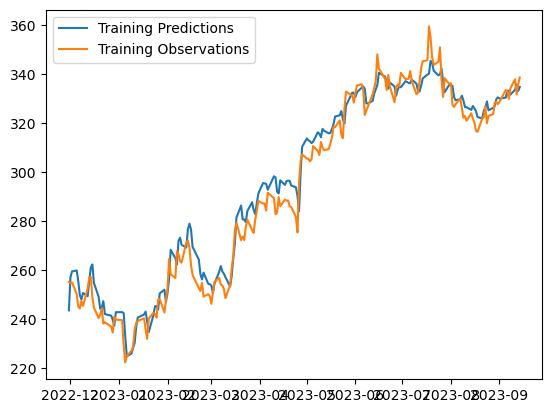

In [27]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 14ms/step


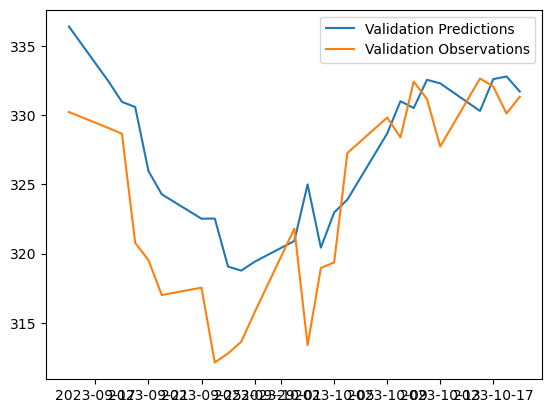

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 14ms/step


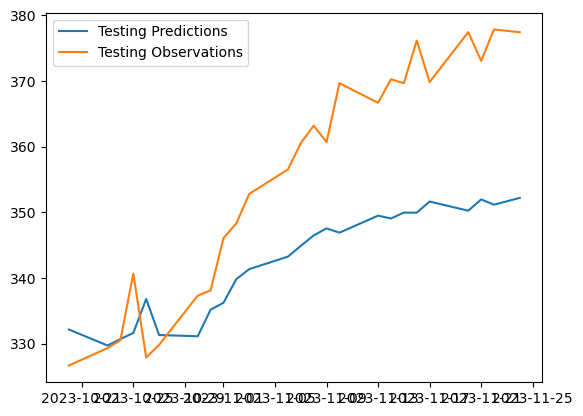

In [29]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

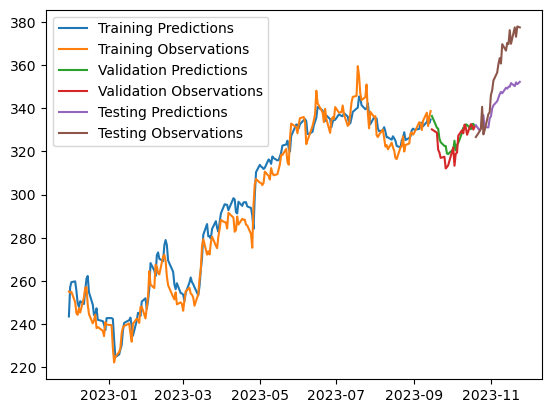

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [31]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 14ms/step


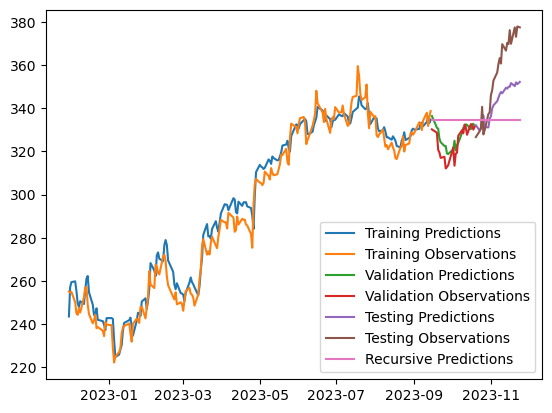

In [32]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions']) #plotting final results